# Modelo de clasificación con CatBoost aplicado al sector bancario.

## Autor: Mateo Londoño Rúa  [LinkedIn](www.linkedin.com/in/mateo-londono-rua117)

En el presente proyecto, vamos a desarrollar un modelo con el fin de predecir si un cliente va a cancelar una cuenta o servicio bancario. A continuación, describimos las variables del dataset:


* **Churn**: Abandono o cancelación de la cuenta (si el cliente ha dejado de ser cliente).
* Customer_Age: Edad del cliente.
* Gender: Género del cliente.
* Dependent_count: Número de dependientes a cargo del cliente.
* Education_Level: Nivel educativo del cliente.
* Marital_Status: Estado civil del cliente.
* Income_Category: Categoría de ingresos del cliente.
* Card_Category: Tipo de tarjeta de crédito que tiene el cliente.
* Months_on_book: Meses que el cliente ha estado con la institución (tiempo con la cuenta activa).
* Total_Relationship_Count: Número total de productos o servicios que el cliente tiene con la institución.
* Months_Inactive_12_mon: Meses en los que el cliente estuvo inactivo en los últimos 12 meses.
* Contacts_Count_12_mon: Número de contactos que el cliente tuvo con la institución en los últimos 12 meses.
* Credit_Limit: Límite de crédito del cliente.
* Total_Revolving_Bal: Saldo total pendiente de la tarjeta de crédito (que se transfiere mes a mes).
* Avg_Open_To_Buy: Promedio del crédito disponible.
* Total_Amt_Chng_Q4_Q1: Cambio en el monto total gastado entre el cuarto trimestre (Q4) y el primer trimestre (Q1).
* Total_Trans_Amt: Monto total de las transacciones.
* Total_Trans_Ct: Número total de transacciones realizadas.
* Total_Ct_Chng_Q4_Q1: Cambio en el número total de transacciones entre Q4 y Q1.
* Avg_Utilization_Ratio: Promedio de la utilización del crédito (ratio de uso del crédito disponible).

### Iniciamos cargando librerias 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_columns',None)

A continuación, cargamos el dataset para ver los datos que contiene y cómo están distribuidos.

In [6]:
df = pd.read_csv('churn_train.csv')
df

,Unnamed: 0,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,2856,0,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868
1,6515,1,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000
2,7141,0,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078
3,632,0,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510
4,3496,0,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,6147,0,46,F,4,High School,Married,Unknown,Blue,30,3,1,3,5869.0,0,5869.0,0.852,5103,83,0.844,0.000
8097,8858,0,52,F,1,High School,Married,Less than $40K,Blue,35,1,3,3,1959.0,1022,937.0,0.780,7847,65,0.857,0.522
8098,3284,1,61,F,0,Graduate,Single,$40K - $60K,Blue,56,3,3,4,9721.0,0,9721.0,0.826,2260,46,1.000,0.000
8099,7551,0,43,F,3,Graduate,Married,Less than $40K,Blue,34,6,2,1,2725.0,2517,208.0,0.482,4430,66,0.692,0.924


### Iniciamos el análisis exploratorio.
Verificamos el tipo de variable y la cantidad de datos en cada columna

In [7]:
df.columns

Index(['Unnamed: 0', 'Churn', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8101 non-null   int64  
 1   Churn                     8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           8101 non-null   object 
 6   Marital_Status            8101 non-null   object 
 7   Income_Category           8101 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

Analizamos cuáles variables tienen una mayor correlación con la variable de interés, que en este caso es el precio de la casa, representado por 'SalePrice'.

In [9]:
cor = df.corr(numeric_only=True)
cor['Churn'].sort_values(ascending=False)


Churn                       1.000000
Contacts_Count_12_mon       0.205486
Months_Inactive_12_mon      0.157937
Unnamed: 0                  0.131396
Dependent_count             0.030940
Customer_Age                0.017256
Months_on_book              0.008124
Avg_Open_To_Buy             0.000161
Credit_Limit               -0.023976
Total_Amt_Chng_Q4_Q1       -0.129157
Total_Relationship_Count   -0.157092
Total_Trans_Amt            -0.173479
Avg_Utilization_Ratio      -0.188519
Total_Revolving_Bal        -0.267587
Total_Ct_Chng_Q4_Q1        -0.286473
Total_Trans_Ct             -0.372500
Name: Churn, dtype: float64

Seleccionamos las variables que consideramos relevantes, basándonos en el conocimiento del negocio, para utilizarlas en el entrenamiento y ajuste de nuestro modelo.

In [10]:
x_cat = ['Education_Level','Marital_Status','Income_Category','Card_Category']

x_num = ['Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Avg_Utilization_Ratio']


features = x_cat + x_num 
x = df[features]
y = df[['Churn']]

Dividimos los datos en conjuntos de entrenamiento, prueba y validación.

In [11]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state= 123)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6480 entries, 337 to 3582
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education_Level         6480 non-null   object 
 1   Marital_Status          6480 non-null   object 
 2   Income_Category         6480 non-null   object 
 3   Card_Category           6480 non-null   object 
 4   Contacts_Count_12_mon   6480 non-null   int64  
 5   Months_Inactive_12_mon  6480 non-null   int64  
 6   Total_Revolving_Bal     6480 non-null   int64  
 7   Total_Ct_Chng_Q4_Q1     6480 non-null   float64
 8   Total_Trans_Ct          6480 non-null   int64  
 9   Avg_Utilization_Ratio   6480 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 556.9+ KB


Verificamos que no haya datos nulos en las variables seleccionadas.

In [13]:
x_train.isnull().sum()

Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Contacts_Count_12_mon     0
Months_Inactive_12_mon    0
Total_Revolving_Bal       0
Total_Ct_Chng_Q4_Q1       0
Total_Trans_Ct            0
Avg_Utilization_Ratio     0
dtype: int64

In [14]:
x_train.describe()

,Contacts_Count_12_mon,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,2.454784,2.343519,1159.570216,0.713005,64.567284,0.277216
std,1.112776,1.013821,812.819953,0.241920,23.444129,0.276268
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.000000,2.000000,355.500000,0.579000,45.000000,0.023000
50%,2.000000,2.000000,1278.000000,0.700000,67.000000,0.181000
75%,3.000000,3.000000,1779.000000,0.818250,80.000000,0.506000
max,6.000000,6.000000,2517.000000,3.714000,139.000000,0.995000


Verificamos si la variable objetivo 'Churn' está balanceada. Observamos que hay más datos de clientes que no cancelan la tarjeta, lo cual podría sesgar el modelo. Para evitar esto, balanceamos los datos de modo que el modelo aprenda de manera equitativa ambos casos.

In [15]:
y_train.value_counts()

Churn
0        5439
1        1041
Name: count, dtype: int64

In [16]:
### Balanceo
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features = [0,1,2,3])
x_train_balanceado, y_train_balanceado = oversample.fit_resample(x_train, y_train)

Visualizamos los datos balanceados para asegurarnos de que ahora ambas clases estén representadas de manera equitativa.

In [17]:
y_train_balanceado.value_counts()

Churn
0        5439
1        5439
Name: count, dtype: int64

In [77]:
### KFold Validation
import catboost


modelo = catboost.CatBoostClassifier(random_state = 123,
                                     cat_features = ['Education_Level','Marital_Status','Card_Category','Income_Category'],
                                     verbose = False,
                                     max_depth = 12)



In [81]:
modelo.fit(x_train,y_train)

Luego de realizar la validación cruzada con los datos balanceados, concluimos que, en este caso particular, es más conveniente entrenar el modelo con los datos originales de 'y_train', en lugar de usar los datos balanceados 'y_train_balanceado'.

In [78]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
cv = cross_validate(modelo, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])

In [79]:
print('TEST')
print('Validacion crusada test:',cv['test_roc_auc'])
print('Media:',np.mean(cv['test_roc_auc']))
print()
print('TRAIN')
print('Validacion crusada train:',cv['train_roc_auc'])
print('Media:',np.mean(cv['train_roc_auc']))

TEST
Validacion crusada test: [0.92962514 0.93814102 0.93228136 0.93607384 0.94921196]
Media: 0.9370666630616673

TRAIN
Validacion crusada train: [0.99767423 0.99737046 0.99726537 0.99837298 0.99872171]
Media: 0.997880949119639


Verificamos los resultados del conjunto de entrenamiento y prueba tras realizar la validación cruzada, lo que nos permite evaluar la robustez del modelo y asegurarnos de que no esté sobreajustado.

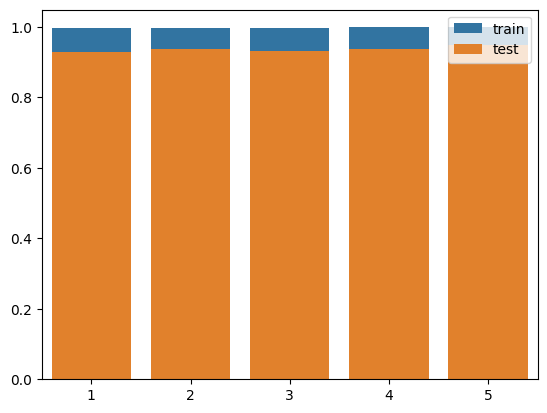

In [80]:
sns.barplot( x = np.arange(1,6), y = cv['train_roc_auc'] , label = 'train') 
sns.barplot( x = np.arange(1,6), y = cv['test_roc_auc'] , label = 'test')
plt.show()

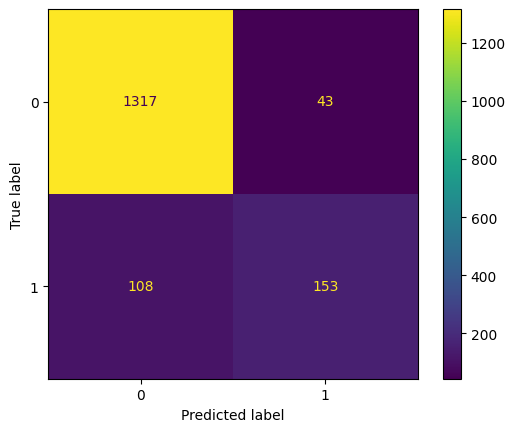

accuracy_score:  0.9068476249228871
sensivilidad:  0.5862068965517241
especificidad:  0.9683823529411765
roc_auc_score:  0.7772946247464503


In [82]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,recall_score

threshold = 0.5
preds = np.where(modelo.predict_proba(x_test)[:,1]>threshold,1,0)

cm = confusion_matrix(y_test,preds)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds))
print('sensivilidad: ',recall_score(y_test,preds,pos_label=1))
print('especificidad: ',recall_score(y_test,preds,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds))

### optimizamos el modelo 

In [47]:
#usamos el optimizado roptuna
import optuna

def objective(trial):


    param = {
        "iterations": trial.suggest_int("iterations",1,100,10),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.001,0.4)
    }
    kf = KFold(n_splits=5)

    modelo_optimizado = catboost.CatBoostClassifier(random_state = 123,
                                        cat_features = ['Education_Level','Marital_Status','Card_Category','Income_Category'],
                                        verbose = False,
                                        **param)

    cv = cross_validate(modelo_optimizado, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])
    auc = np.mean(cv['test_roc_auc'])
    dispersion = np.std(cv['test_roc_auc'])
    return auc

In [48]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2024-09-11 20:50:53,690] A new study created in memory with name: no-name-2bf4ca58-562e-47c1-b81b-dbf98882cc25
[I 2024-09-11 20:50:56,038] Trial 0 finished with value: 0.8087934554845233 and parameters: {'iterations': 11, 'colsample_bylevel': 0.056859843617071554, 'depth': 6, 'learning_rate': 0.04870484917184334}. Best is trial 0 with value: 0.8087934554845233.
[I 2024-09-11 20:51:00,094] Trial 1 finished with value: 0.9180045395832845 and parameters: {'iterations': 91, 'colsample_bylevel': 0.08832924346041682, 'depth': 12, 'learning_rate': 0.09792913050270148}. Best is trial 1 with value: 0.9180045395832845.
[I 2024-09-11 20:51:02,669] Trial 2 finished with value: 0.5846383104112078 and parameters: {'iterations': 1, 'colsample_bylevel': 0.05227587938694238, 'depth': 8, 'learning_rate': 0.26147905313712894}. Best is trial 1 with value: 0.9180045395832845.
[I 2024-09-11 20:51:04,584] Trial 3 finished with value: 0.722824738209088 and parameters: {'iterations': 21, 'colsample_bylevel'

Extraemos los mejores parámetros para el modelo después de la optimización.

In [50]:
study.best_params

{'iterations': 81,
 'colsample_bylevel': 0.09168748985927101,
 'depth': 11,
 'learning_rate': 0.20041210271697182}

In [53]:
study.best_trial

FrozenTrial(number=8, state=1, values=[0.9278100822945253], datetime_start=datetime.datetime(2024, 9, 11, 20, 51, 15, 822242), datetime_complete=datetime.datetime(2024, 9, 11, 20, 52, 34, 699151), params={'iterations': 81, 'colsample_bylevel': 0.09168748985927101, 'depth': 11, 'learning_rate': 0.20041210271697182}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=91, log=False, low=1, step=10), 'colsample_bylevel': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'depth': IntDistribution(high=12, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=0.4, log=False, low=0.001, step=None)}, trial_id=8, value=None)

Implementamos los nuevos parámetros en el modelo.

In [54]:
param = {'iterations': 81,
 'colsample_bylevel': 0.09168748985927101,
 'depth': 11,
 'learning_rate': 0.20041210271697182}


modelo_optimizado = catboost.CatBoostClassifier(random_state = 123,
                                    cat_features = ['Education_Level','Marital_Status','Card_Category','Income_Category'],
                                    verbose = False,
                                        **param)

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
cv_optimizado = cross_validate(modelo_optimizado, x_train, y_train, cv = kf, return_train_score = True , scoring = ['roc_auc'])

In [56]:
print('TEST')
print('Validacion crusada test:',cv_optimizado['test_roc_auc'])
print('Media:',np.mean(cv_optimizado['test_roc_auc']))
print()
print('TRAIN')
print('Validacion crusada train:',cv_optimizado['train_roc_auc'])
print('Media:',np.mean(cv_optimizado['train_roc_auc']))

TEST
Validacion crusada test: [0.92305012 0.92833814 0.92452744 0.9214768  0.94165791]
Media: 0.9278100822945253

TRAIN
Validacion crusada train: [0.93641864 0.93559182 0.93783527 0.93842276 0.93478647]
Media: 0.9366109897793411



Verificamos mediante validación cruzada que el modelo con los nuevos hiperparámetros optimizados es más preciso que el modelo inicial.

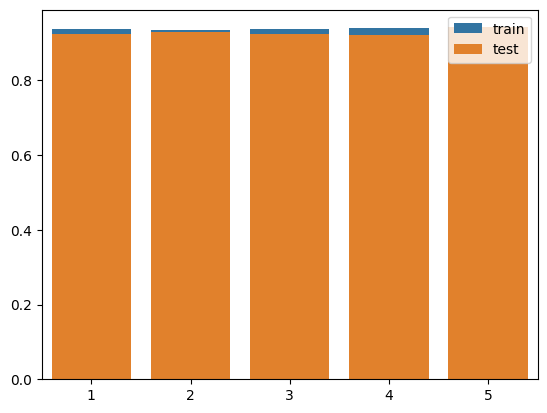

In [57]:
sns.barplot( x = np.arange(1,6), y = cv_optimizado['train_roc_auc'] , label = 'train') 
sns.barplot( x = np.arange(1,6), y = cv_optimizado['test_roc_auc'] , label = 'test')
plt.show()

In [58]:
modelo_optimizado.fit(x_train,y_train)

In [83]:
preds_optimizad = modelo_optimizado.predict(x_test)

A continuación, podemos revisar la matriz de confusión y las métricas para evaluar el modelo de clasificación.


**Accuracy_score:** Mide la proporción de predicciones correctas sobre el total de predicciones. Es decir, cuántas veces el modelo predijo correctamente 

**Sensibilidad:** (recall_score con pos_label=1): También conocida como "recall" o "verdaderos positivos", es la proporción de observaciones positivas correctamente identificadas por el modelo.

**Especificidad:** (recall_score con pos_label=0): Es la capacidad del modelo de identificar correctamente los negativos

**roc_auc_score:** El área bajo la curva ROC mide la capacidad del modelo para discriminar entre clases positivas y negativas. Un valor de 1 indica una perfecta separación entre las clases, mientras que un valor de 0.5 indica que el modelo no tiene capacidad de discriminación

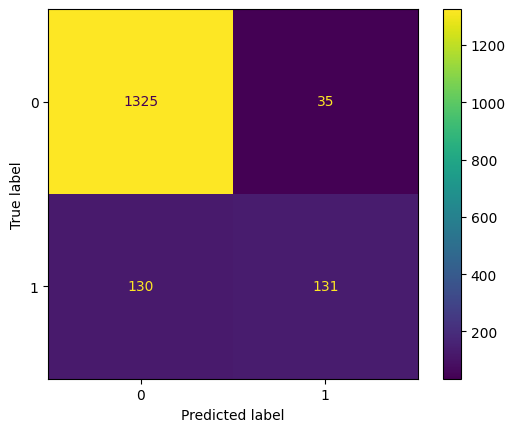

accuracy_score:  0.8982109808760025
sensivilidad:  0.5019157088122606
especificidad:  0.9742647058823529
roc_auc_score:  0.7380902073473067


In [84]:


threshold = 0.5
preds_optimizado = np.where(modelo_optimizado.predict_proba(x_test)[:,1]>threshold,1,0)

cm = confusion_matrix(y_test,preds_optimizado)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()


print('accuracy_score: ',accuracy_score(y_test,preds_optimizado))
print('sensivilidad: ',recall_score(y_test,preds_optimizado,pos_label=1))
print('especificidad: ',recall_score(y_test,preds_optimizado,pos_label=0))
print('roc_auc_score: ',roc_auc_score(y_test,preds_optimizado))

### Grafico - curva roc_auc_score

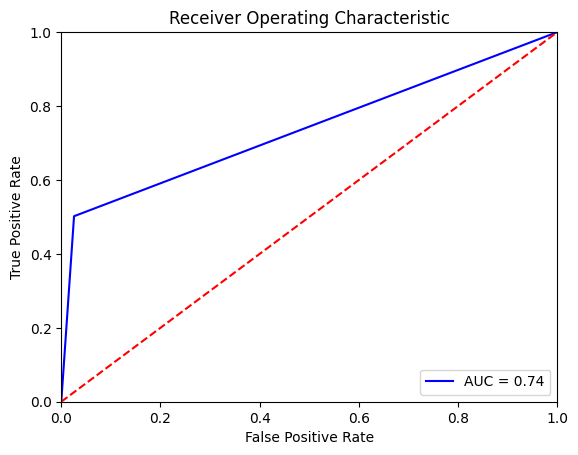

In [85]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = modelo.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_optimizado)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Grafica  - Curva de Precisión-Recall 

Esta gráfica nos ayuda a escoger el threshold (umbral) ideal para tu modelo de clasificación. Nos permite visualizar el balance entre precisión y recall a medida que cambias el umbral de decisión.

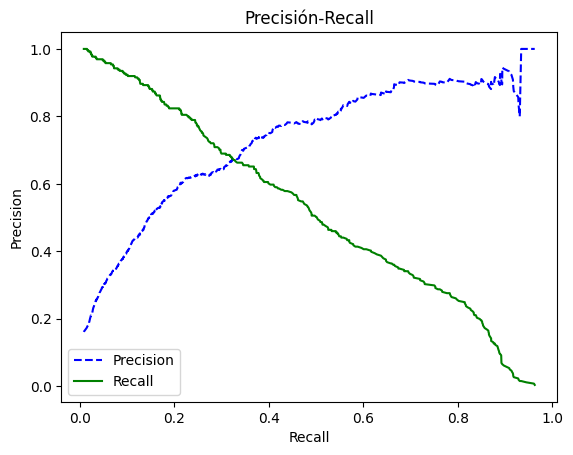

(array([0.16101172, 0.16131026, 0.1615099 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00766284, 0.00383142,
        0.        ]),
 array([0.00836322, 0.00844795, 0.00878958, ..., 0.94537251, 0.96149255,
        0.96309249]))

In [86]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall(y_test, preds_optimizado):
    y_proba = preds_optimizado[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    auc_precision_recall = metrics.auc(recall, precision)
    plt.figure()
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precisión-Recall')
    plt.legend(loc='best')
    plt.show()
    return precision, recall, thresholds

plot_precision_recall(y_test, modelo_optimizado.predict_proba(x_test))

Podemos visualizar en un DataFrame de Pandas los valores reales y las predicciones del modelo.

In [87]:
df_salida = y_test.copy()
df_salida['preds'] = preds_optimizado
df_salida

,Churn,preds
7990,0,0
1613,0,0
6741,0,0
7718,0,0
7067,1,1
...,...,...
7420,0,0
1247,0,0
2862,0,0
4729,1,0


Verificamos de forma gráfica cuáles son las variables que más importancia tienen para el modelo.

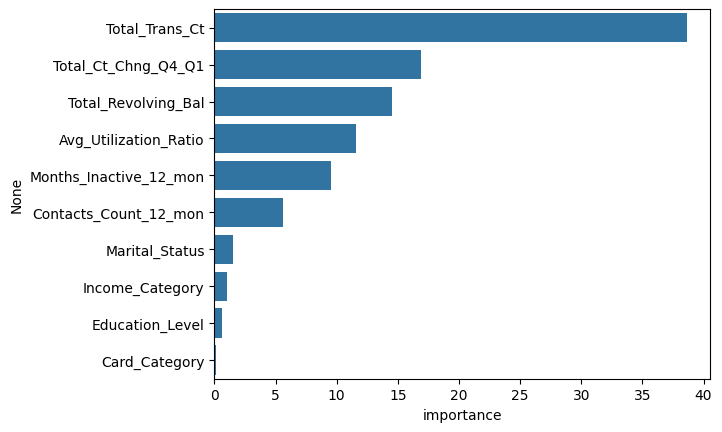

In [63]:
a = pd.DataFrame(modelo_optimizado.feature_importances_, columns = ['importance'], index = features).sort_values(by = ['importance'], ascending = False)
sns.barplot(a, x = 'importance', y = a.index)
plt.show()